In [1]:
import uproot
import numpy as np
import re
import matplotlib.pyplot as plt
import sys

sys.path.append('../../')
from carpet_reconstruction import GetCarpetSignal, get_PFA_theta, constr, Chi_sq, get_PFAWTC_theta

from scipy.optimize import minimize

In [2]:
plt.rcParams['figure.dpi'] = 400

In [3]:
filename = '../../Geant4Model/build/Output/output_test.root'
file = uproot.open(filename)

names = np.array(file.keys())
times = names[:len(names) // 3]
cover_hists = names[len(names) // 3::2]

In [4]:
time_array = np.zeros((len(times), 4))

for i, time in enumerate(times):
    time_array[i] = file[time]['t_ns'].array(library='np')[1:5]

# PFAWTC

In [5]:
x_EAS = []
y_EAS = []

for hist_name in cover_hists:
    x_EAS.append(hist_name.split('_')[3])
    y_EAS.append(hist_name.split('_')[4])

In [6]:
PFAWTC_angles = []

for i, time_arr in enumerate(time_array):
    if np.all(time_arr):
        result = get_PFAWTC_theta(time_arr, x_EAS[i], y_EAS[i])
        
        if not np.any(np.isnan(result)):
            fitted_params = result
            #print(fitted_params[0]**2+fitted_params[1]**2+fitted_params[2]**2)
            theta = np.degrees(fitted_params[0])
            PFAWTC_angles.append(theta)

In [7]:
PFAWTC_angles = np.array(PFAWTC_angles)
np.median(PFAWTC_angles)

8.604703280743637

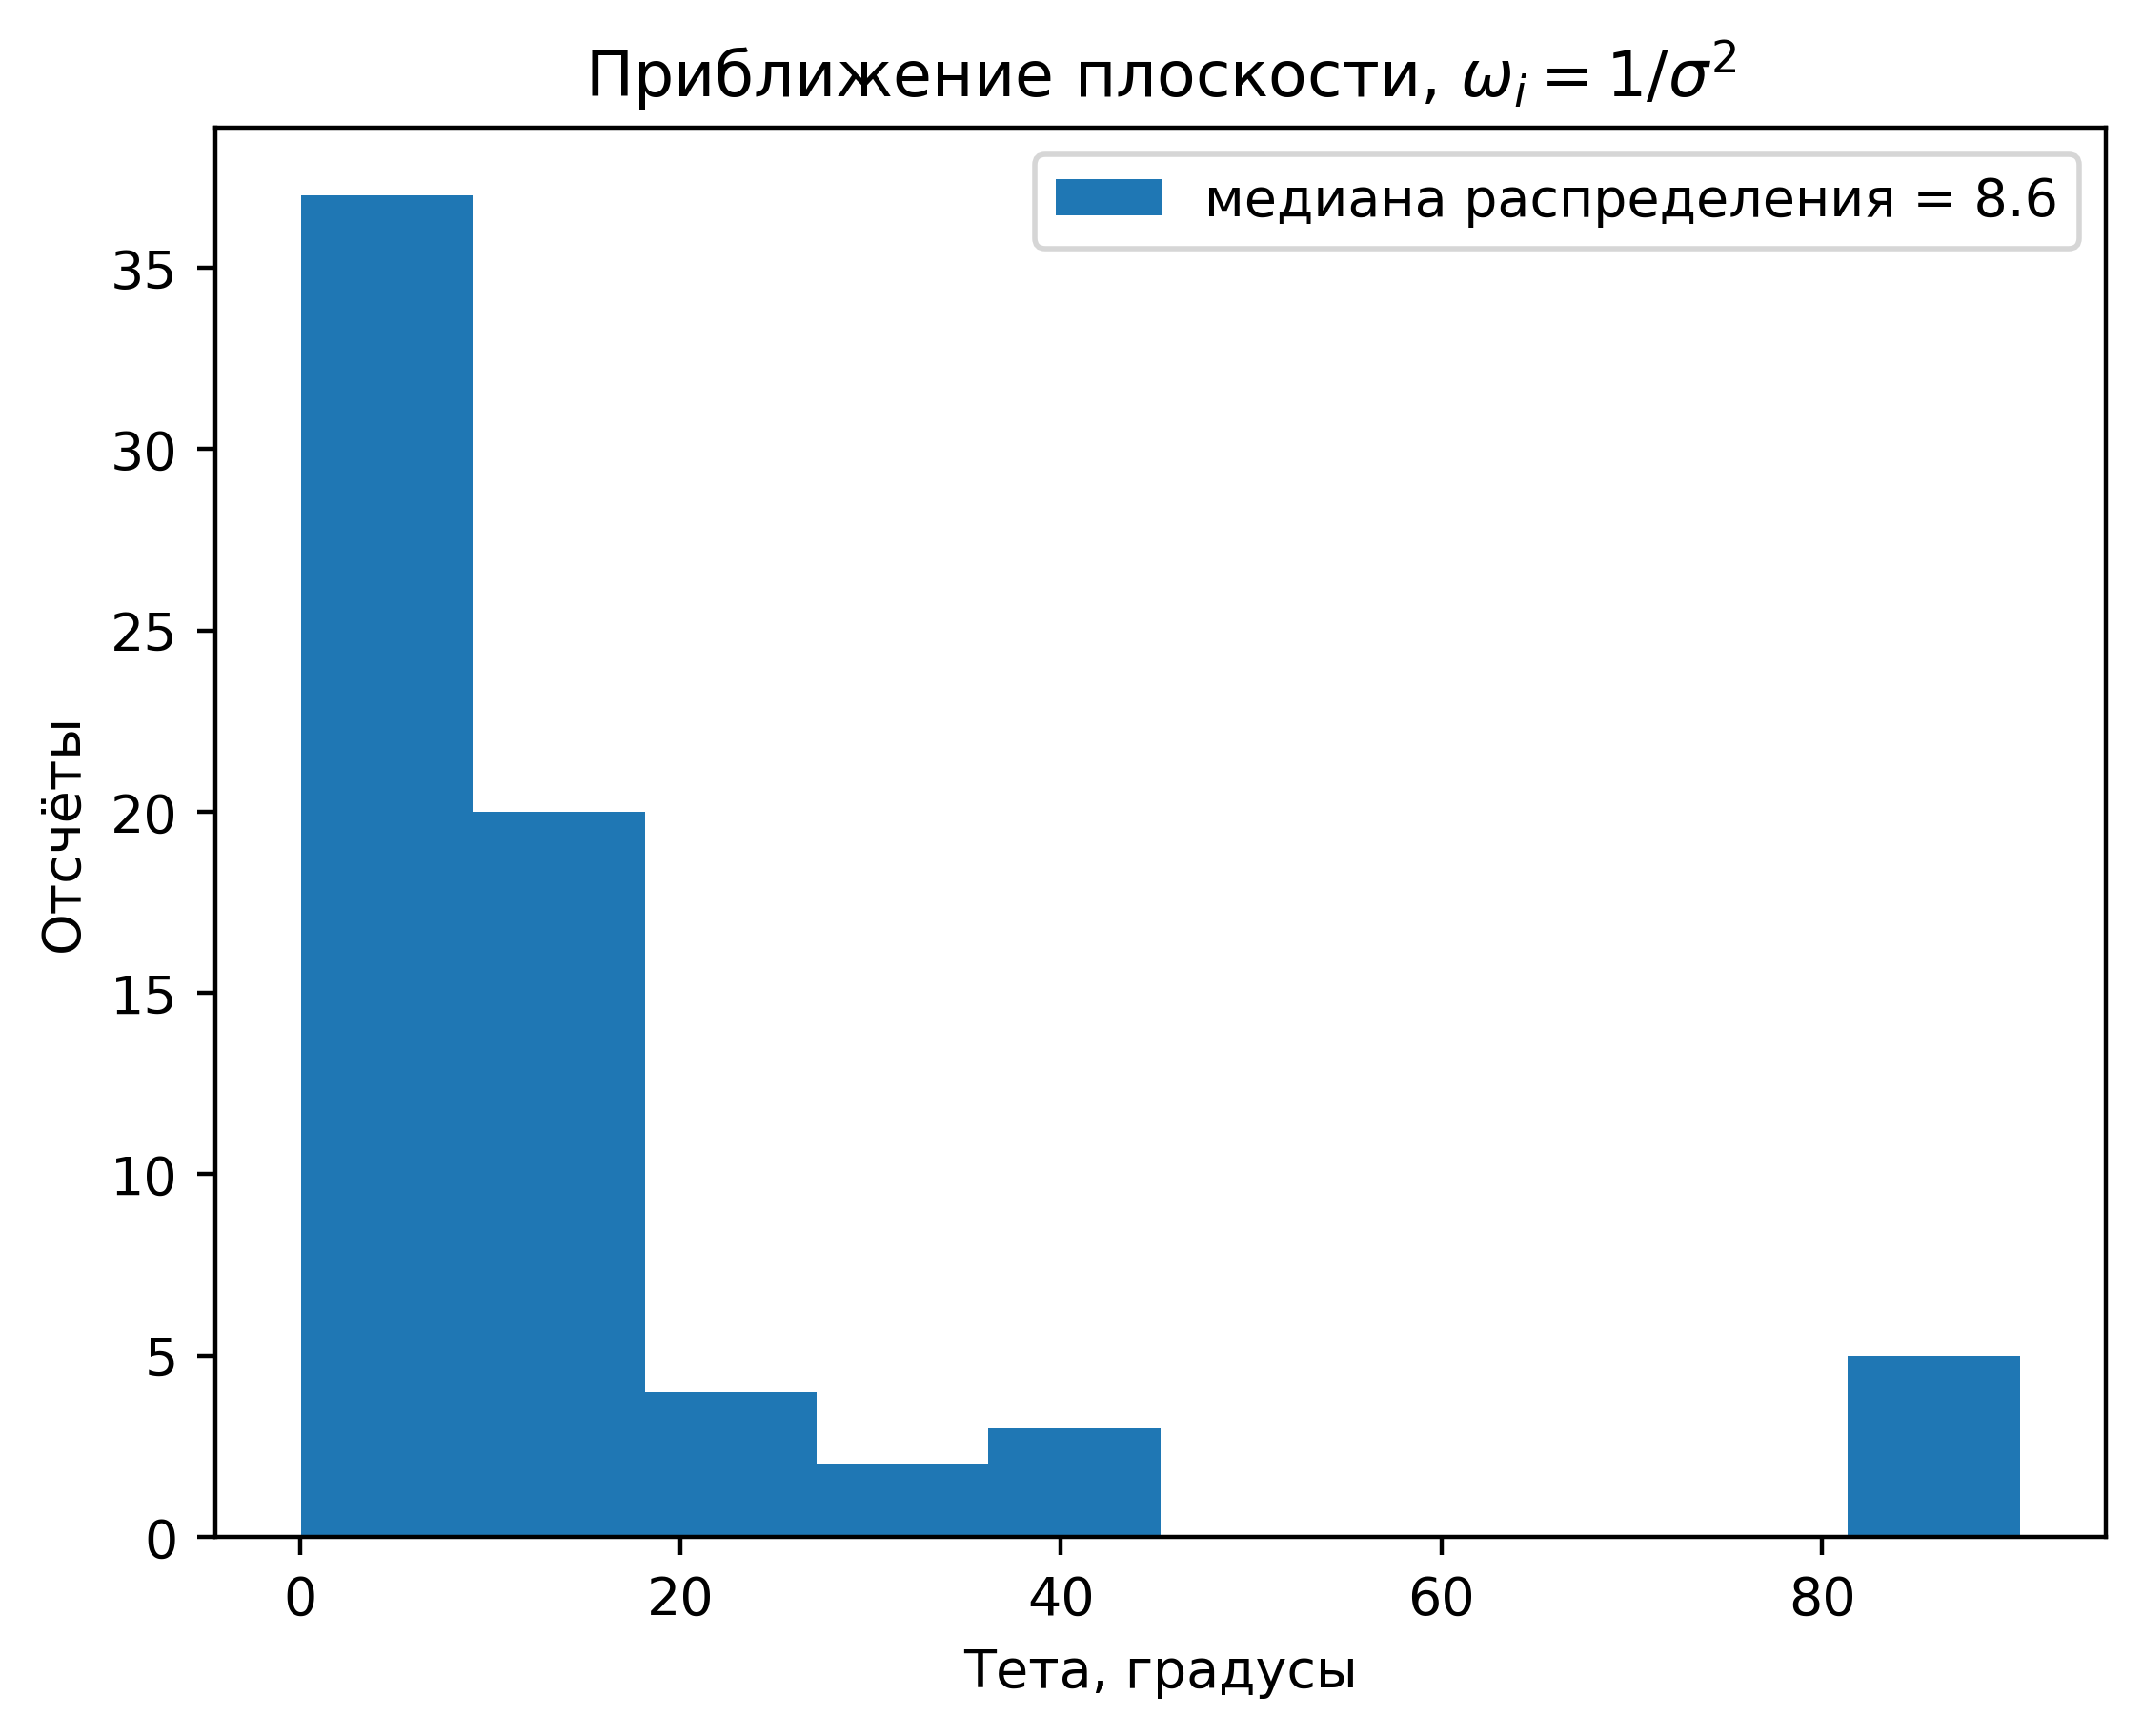

In [8]:
plt.hist(PFAWTC_angles, label='медиана распределения = '+str(round(np.median(PFAWTC_angles), 2)))

plt.title('Приближение плоскости, $\omega_i = 1/\sigma^2$')

plt.xlabel('Тета, градусы')
plt.ylabel('Отсчёты')

plt.legend(loc='upper right')

plt.savefig('PFAWTC.png')